In [1]:
import pandas as pd
import numpy as np
import missingno
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
placement_df = pd.read_csv("../Placement_Data_Full_Class.csv")
print(placement_df.shape)
print(placement_df.info())
placement_df.head()

(215, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
print((placement_df["sl_no"].values == np.arange(1, placement_df.shape[0] + 1)).all())
# We don't need sl_no, it's just an index
placement_df.drop(columns="sl_no", inplace=True)

True


In [4]:
placement_df.drop_duplicates().shape
# There are no duplicates

(215, 14)

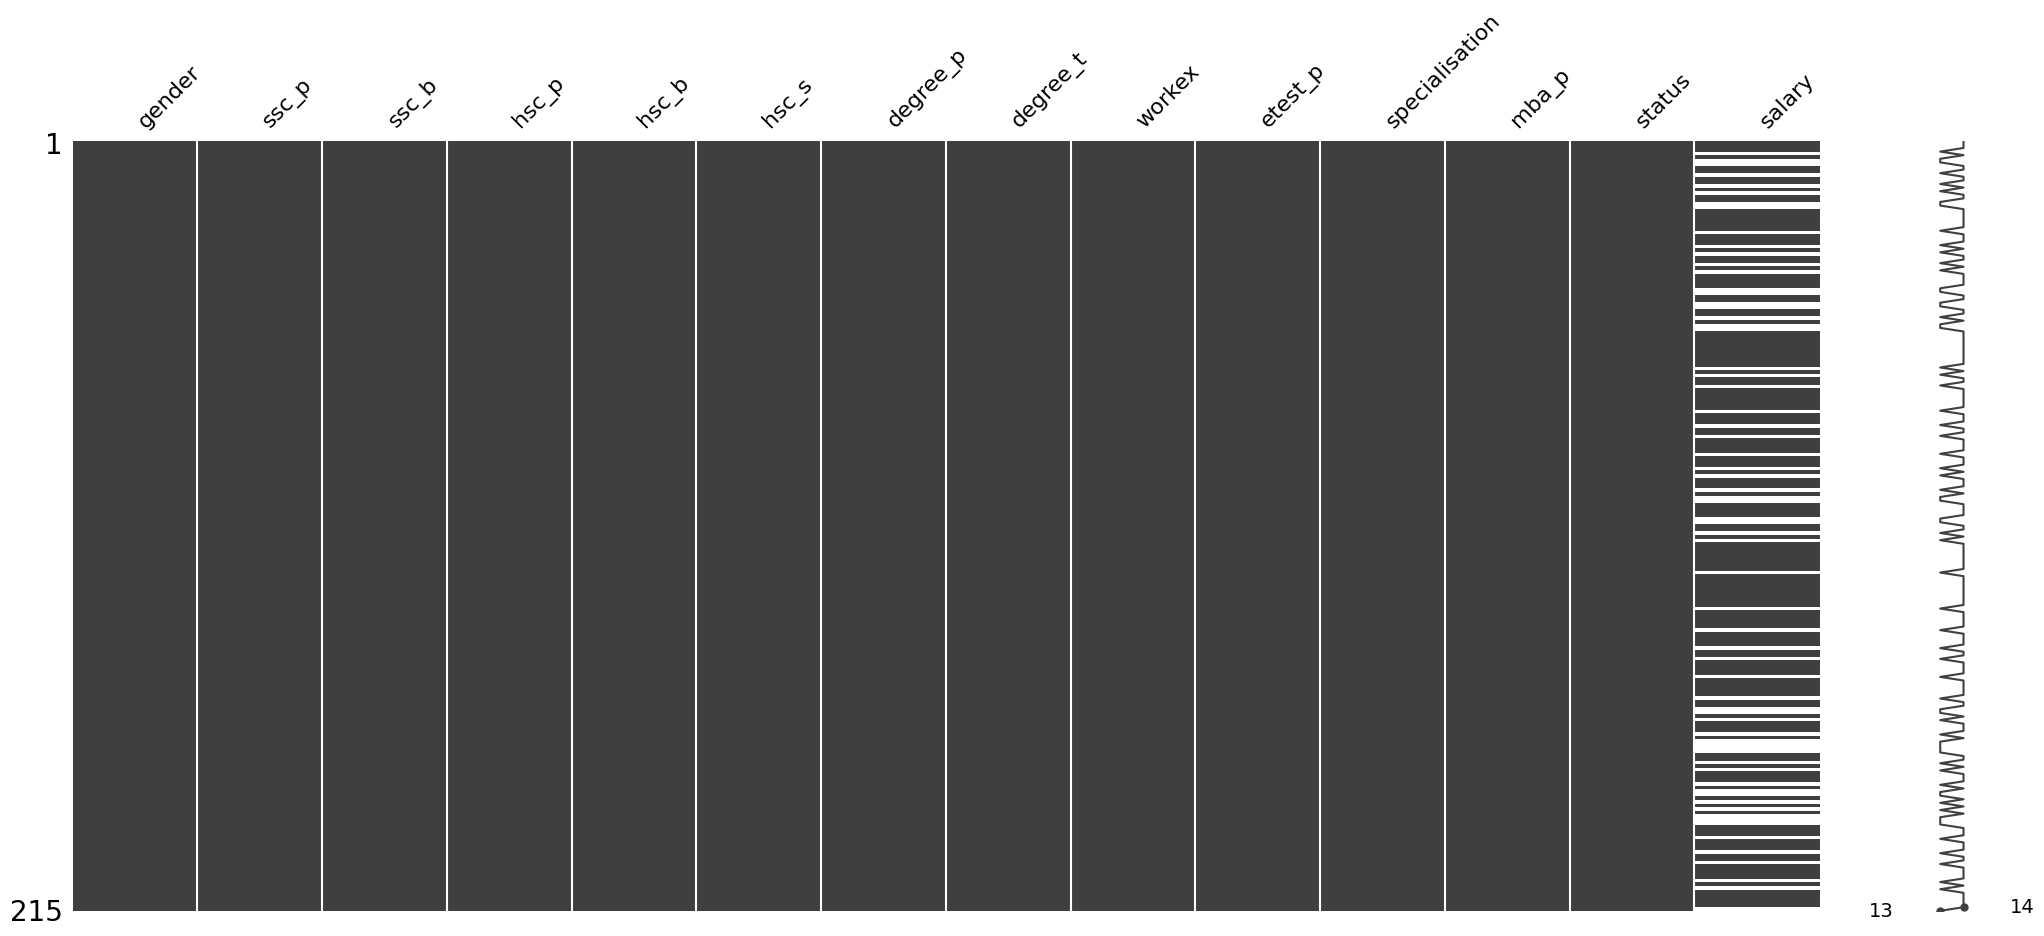

In [5]:
missingno.matrix(placement_df);

In [6]:
not_placed = placement_df[placement_df["status"] == "Not Placed"]
print(not_placed.shape[0] == not_placed["salary"].isna().sum())
# We see that salary is NaN if and only if the participant was not recruited

True


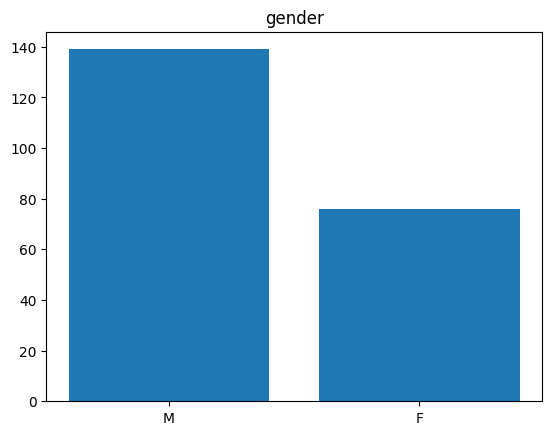

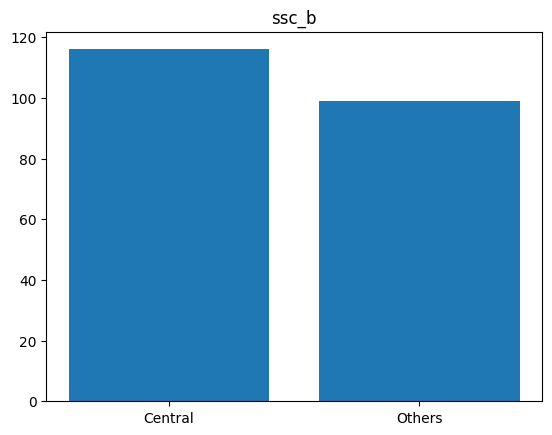

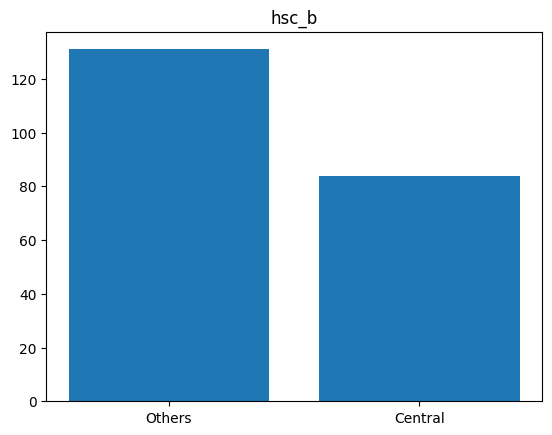

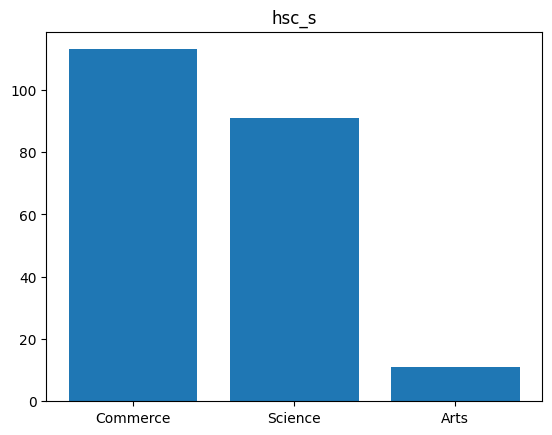

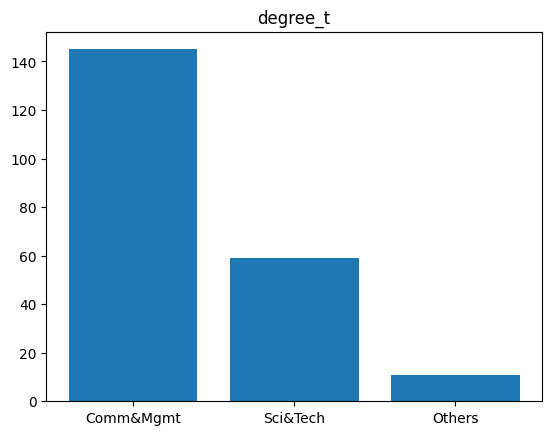

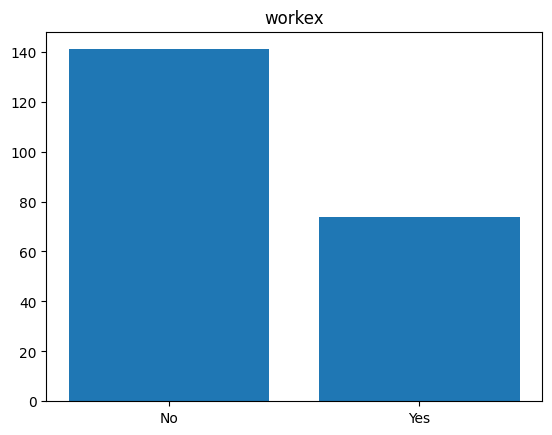

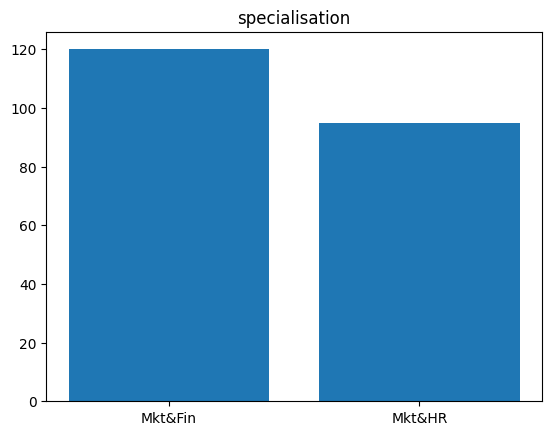

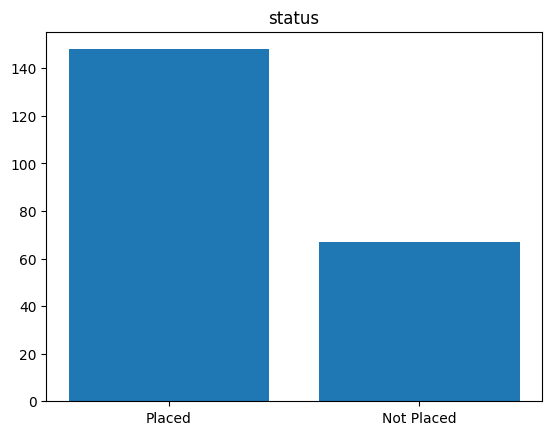

In [7]:
categorical_col = ["gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation", "status"] 
for col in categorical_col:
    vc = placement_df[col].value_counts()
    plt.title(col)
    plt.bar(vc.index, vc.values)
    plt.show()

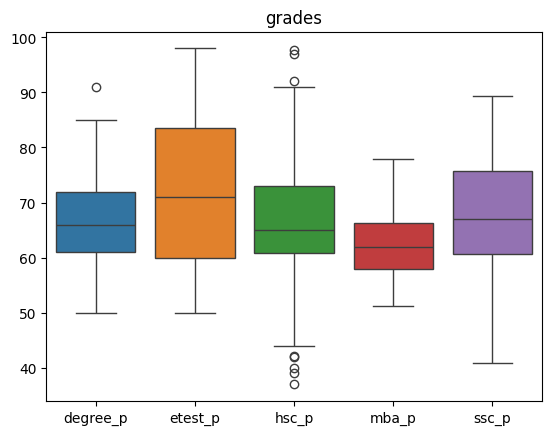

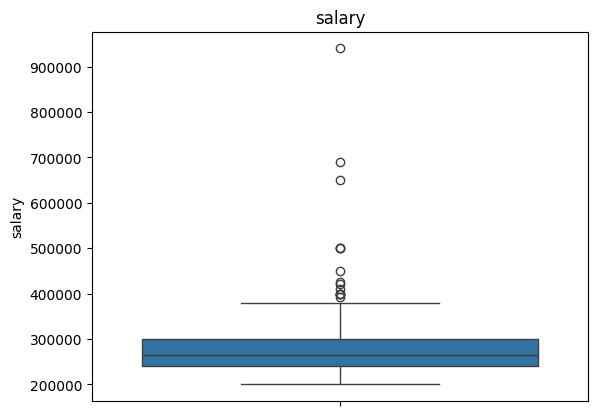

In [8]:
numerical_col = placement_df.columns.difference(categorical_col)
grades = ["degree_p", "etest_p", "hsc_p", "mba_p", "ssc_p"]
plt.title("grades")
sns.boxplot(placement_df[grades])
plt.show()
plt.title("salary")
sns.boxplot(placement_df["salary"])
plt.show()

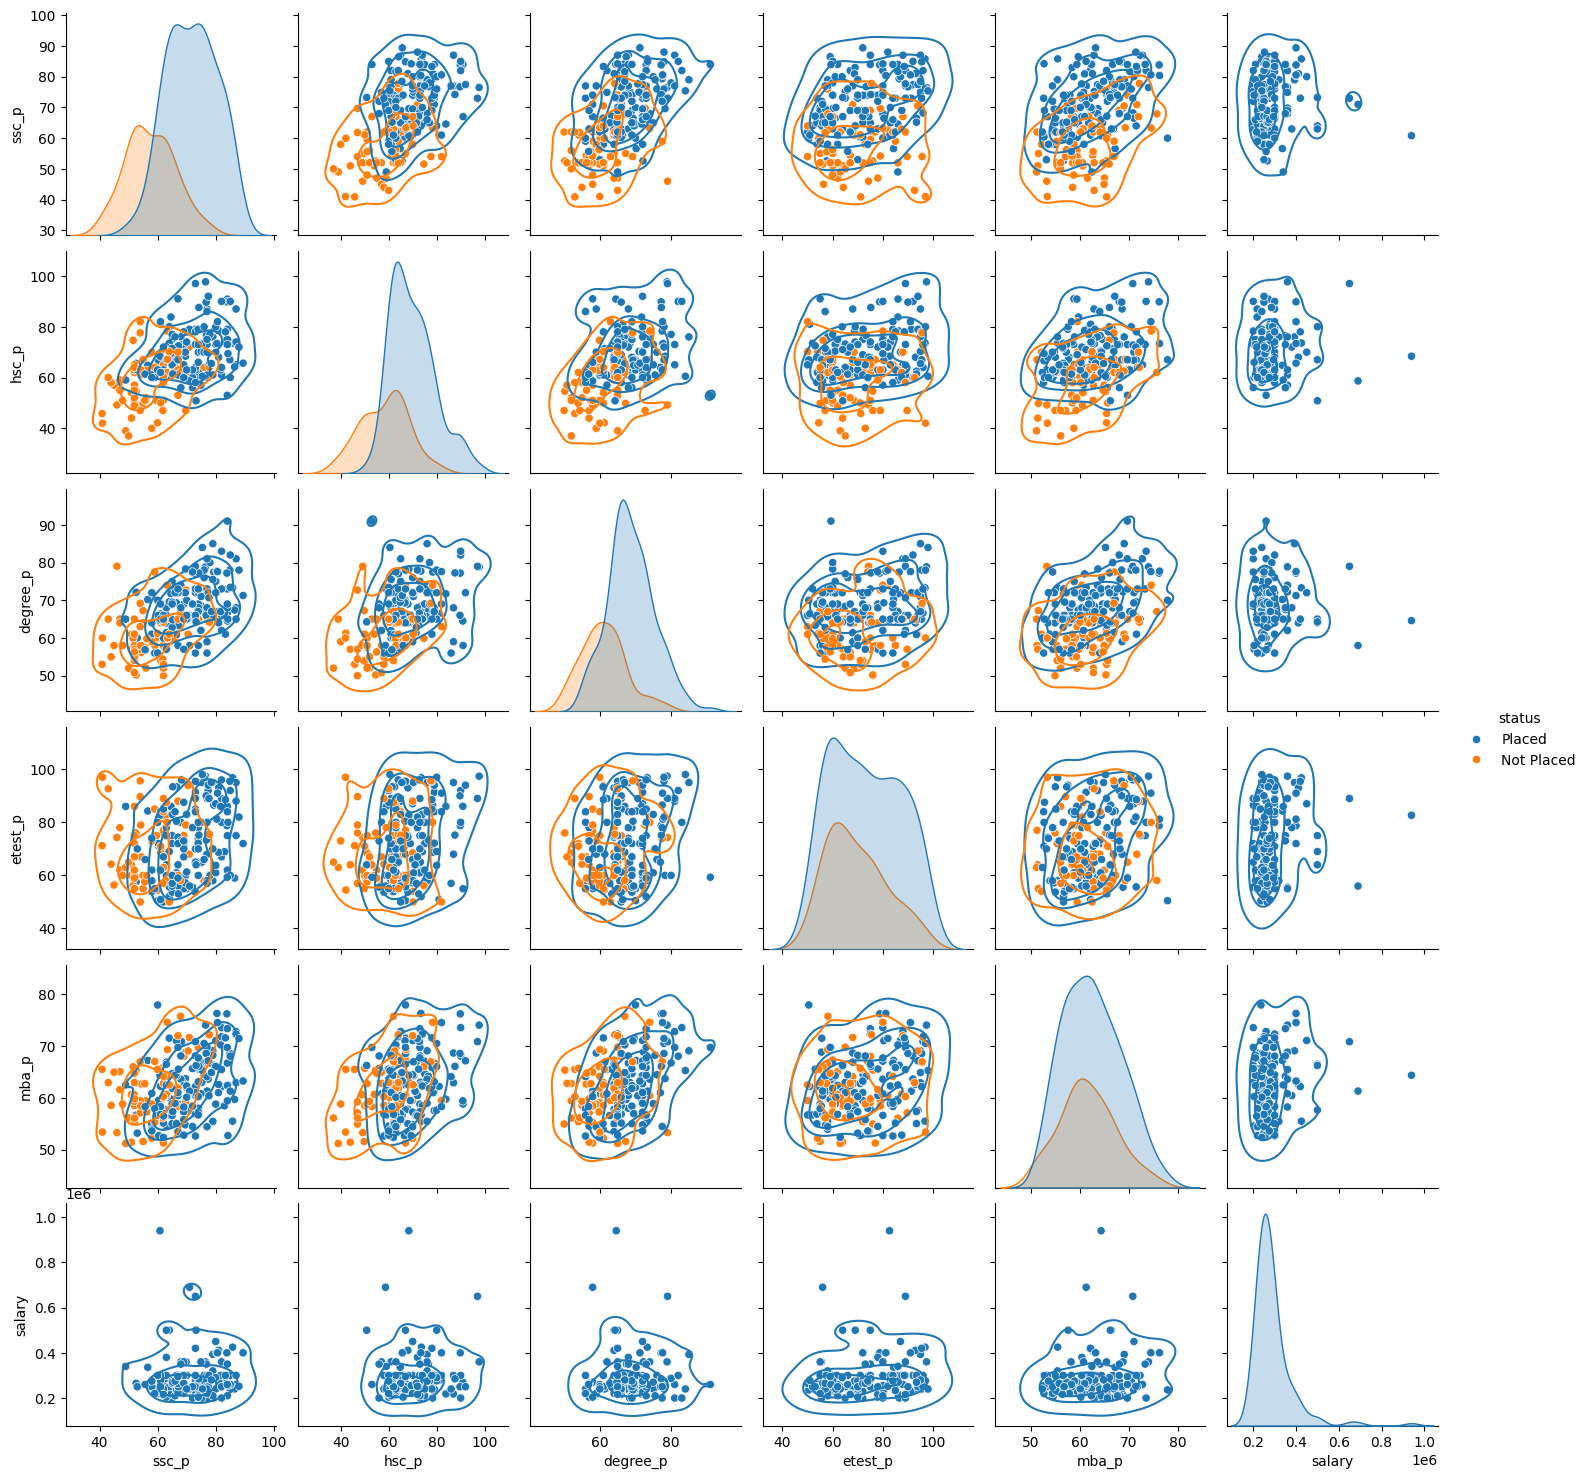

In [9]:
g = sns.pairplot(placement_df, hue="status")
g.map_offdiag(sns.kdeplot, levels=4, color=".2");

In [10]:
placement_df["gender"] = placement_df["gender"].map(dict(F=0, M=1))
placement_df["workex"] = placement_df["workex"].map(dict(No=0, Yes=1))
placement_df["status"] = placement_df["status"].map({"Not Placed": 0, "Placed": 1})

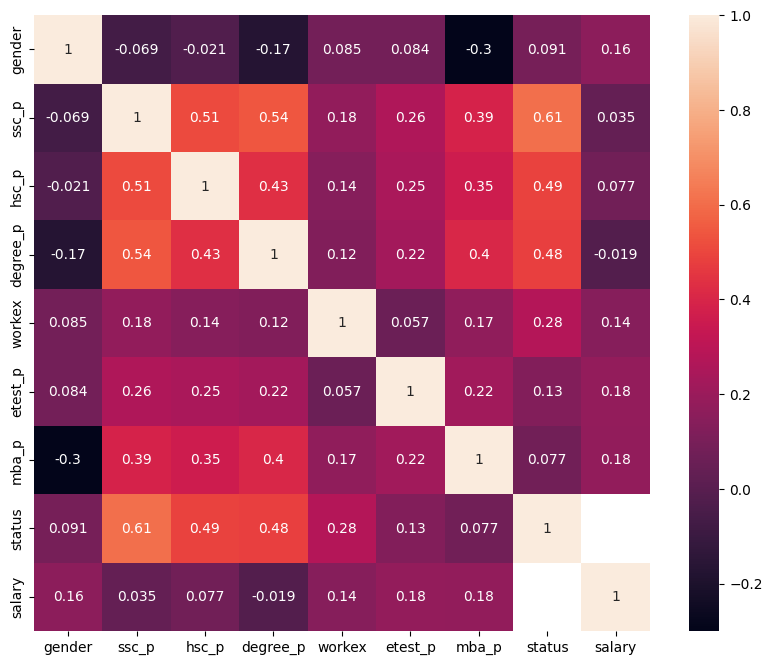

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    placement_df.drop(
        columns=["ssc_b", "hsc_b","hsc_s", "degree_t", "specialisation"]
    ).corr(),
    annot=True,
    square=True
);

In [12]:
placement_df.to_csv("../Placement_Data_Processed.csv")